<a href="https://colab.research.google.com/github/majaszymajda/PNoD_wyklad/blob/main/Regesja_liniowa_Egzamin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analiza danych z wykorzystaniem Regresji Liniowej - stworzenie i analiza modelu Metodą Najmniejszych Kwadratów

Aby wyznaczyć linię regresji, a tym samym wzór regresji lniowej należy obliczyć współczynniki linii prostej, a i b. W tym celu wykorzystuję metodę najmniejszych kwadratów błędu. Metoda ta dostarcza nam takich współczynników a i b, które powodują, że linia regresji jest najlepiej dopasowana do zebranych danych .
Sam wzór na prostą reprezentuje: a - współczynnik regresji i b - wyraz wolny.



#Import potrzebnych bibliotek i funkcji



In [18]:
import csv
import time
import sklearn
import requests
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.dummy import DummyRegressor
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Wczytanie pliku csv

In [2]:
def importowanie_danych_csv(nazwa_pliku):
    with open(nazwa_pliku) as plik:
        dane = csv.reader(plik, delimiter=';')
        dane_tablica = []
        try:
            for dana in dane:
                dane_tablica.append(dana)
            print(dane_tablica)
        except csv.Error as error:
            print(f"nie udało się wczytać pliku {nazwa_pliku} błąd: {error.msg} ")
            return None

    return dane_tablica

# Pobieranie danych z pliku

In [3]:

files = [
  "czas_kalorie.csv"
]

def download_and_save_locally(file):
    data = requests.get(f'https://github.com/majaszymajda/PNoD_wyklad/raw/main/{file}')
    if data.status_code != 200:
      print(f"Blad pobierania pliku {file}")

    with open(file, "wb") as f:
      f.write(data.content)

    print(f"Pobrano plik {file}")


# Wczytanie i podział danych

In [4]:

for f in files:
    download_and_save_locally(f)
    # dane = importowanie_danych_csv(f)
    # odczytywanie danych z pliku csv
    dataset = pd.read_csv(f)
    # podział naszych danych na x i y 
    X = dataset.iloc[ : , : -1]
    Y = dataset.iloc[ : , -1]
    

Pobrano plik czas_kalorie.csv


In [5]:
# wilgoc = [] # cisnienie
# temp = [] # temeperatura
# czas = [] # czas
# for i in range(1, 50):
#  wilgoc.append(float(dane[i][2]))
#  temp.append(float(dane[i][1]))
#  czas.append(float(dane[i][0]))


#  Przygotowanie danych do dalszej pracy pracy - "wsadzenie w ramke"

In [6]:
x = pd.DataFrame(X)
y = pd.DataFrame(Y)


# Podział danych na treningowe i testowe
Gdzie testowe to 20% z całego zbioru danych

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=1)

# Wizualizacja danych przed uczeniem maszynowym  

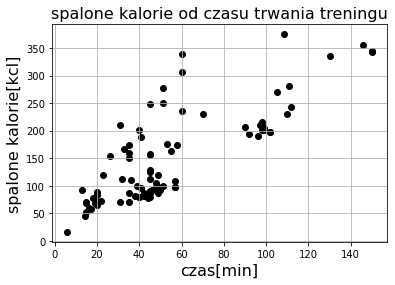

In [8]:
# print(x_train)
# print(y_train)
plt.scatter(x_train, y_train,  color='black')
plt.title("spalone kalorie od czasu trwania treningu", fontsize=16)
plt.xlabel("czas[min]", fontsize=16)
plt.ylabel("spalone kalorie[kcl]", fontsize=16)
plt.grid(True)

xmin=0 
xmax=150
ymin=0
ymax=360
#xmin, xmax, ymin, ymax = plt.axis()
plt.xlim=(xmin, xmax)
plt.ylim=(ymin, ymax)

plt.show()

Będziemy dążyć do znalezienia modelu jak najlepiej odwzorującego spalane kalorie od czasu trwania treningu

In [9]:
dummy_reg= DummyRegressor(strategy='mean')
dummy_reg.fit(x_train, y_train)
# print(dummy_reg.predict(x_train))
print("Współczynnik determinacji na podstawie 'zgadywanej' regresji jest ujemny ponieważ jest dużo gorszy niż przewidywany")
print(dummy_reg.score(x_test, y_test))


Współczynnik determinacji na podstawie 'zgadywanej' regresji jest ujemny ponieważ jest dużo gorszy niż przewidywany
-0.017095826288641813


Zasada działania MNK:

Zakładamy, że dany jest model y=fi(x)^T * W, w to wektor parametrów, a fi(x) jest wektorem cech. 

Dopasowanie modelu do danych polega na znalezieniu wartości parametrów
w. W tym celu będziemy minimalizować funkcję błędu, która określa różnicę między obserwacjami a wartościami zwracanymi przez model. Taką funkcją jest suma kwadratów różnic między predykcjami modelu a obserwacjami.
W możemy wyliczyć wartości parametrów za pomocą liczenia pochodnej po sumie rozwiązując jak równanie, bądź macierzowo. 


# Wykonanie modelu regeresji liniowej i sprawdzenie jego jakości średnim błędem kwadratowym

In [17]:
# regresja liniowa
regr = linear_model.LinearRegression()
# karmienie modelu danymi
regr.fit(x_train, y_train)

# predykcja dla danych testowych
y_pred = regr.predict(x_test)

print('Współczynnik determinacji modelu uczącego się: %.2f' 
    %regr.score(x_train, y_train))

# współczynnik regresji - w f liniowej jest to współczynnik kierunkowy
print('Współczynnik regesji: \n', regr.coef_)
# średni bład kwadratowy - sprawdza jakość modelu 
print('Średni błąd kwadratowy na danych testowych: %.2f'
      % mean_squared_error(y_test, y_pred))
# współczynnik determinacji -  określa jaka część danych jest wytłumaczona przez model – im większy tym prosta regresji jest lepiej dopasowana do danych
print('Współczynnik determinacji na danych testowych: %.2f' 
      % r2_score(y_test, y_pred))

print("Podsumowując współczynniki prostej to: %.2f"
      % regr.coef_, regr.intercept_)

#print(x_train)
#print("_-----")
#print(regr.predict(x_train))


Współczynnik determinacji modelu uczącego się: 0.63
Współczynnik regesji: 
 [[1.9873099]]
Średni błąd kwadratowy na danych testowych: 1696.40
Współczynnik determinacji na danych testowych: 0.79
Podsumowując współczynniki prostej to: 1.99 [41.39002183]


* współczynnik regresji - jest to współczynnik a kierunkowy naszej prostej: y= ax+b, 
* średni błąd kwadratowy - jest to suma różnic między wartością a przewidywaną wartością dla argumentu x, mówi on o jakości naszego modelu
* współczynnik determinacji - określa jaka część danych jest wytłumaczona przez model – im większy tym prosta regresji jest lepiej dopasowana do danych


# Wizualizacja modelu

In [ ]:
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_train, regr.predict(x_train), color='blue')
plt.title("spalone kalorie od czasu trwania treningu", fontsize=16)
plt.xlabel("czas[min]", fontsize=16)
plt.ylabel("spalone kalorie[kcl]", fontsize=16)

plt.grid(True)
xmin=0 
xmax=150
ymin=0
ymax=360
#xmin, xmax, ymin, ymax = plt.axis()
plt.xlim=(xmin, xmax)
plt.ylim=(ymin, ymax)
plt.show()

MNK używamy gdy np. chcemy zlinearyzować model (można wielomian włożyć w macierz wejść - chociaż w tym przypadku mamy model jednowymiarowy i parametrów).

Kiedy możemy operować na gołych(nie modelujemy w żaden dodatkowy sposób) parametrach, czyli estymuje wartość mierzonej wielkości.
Zakłócenia są addytywne(sumują się). 
Wartość oczekiwana zakłóceń jest 0.
Zalety MNK:

*   Nie jest potrzeba duża ilość informacji.
*   Stosunkowo prosty, mało złożony obliczeniowo.

Wady:

*  Ignoruje bardziej zaawansowaną wiedzę o modelu
*  Zakłada że wartość zakłóceń jest równa 0.






